In [117]:
"""
dn= dimansion of society
t_rec= time of Recovery
TS= the time pass by each step
d_p= days passed
P= chance sb get sick
"""

'\ndn= dimansion of society\nt_rec= time of Recovery\nTS= the time pass by each step\nd_p= days passed\nP= chance sb get sick\n'

In [118]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy.integrate as spi
import numpy as np

In [119]:
dn=64
P=1/10
t_rec=5
TS=1.0
ND=70
d_p=0

In [120]:
snode=[]
inode=[]
rnode=[]
sdata=[]
idata=[]
rdata=[]
tdata=[]

In [121]:
G=nx.grid_2d_graph(dn, dn, periodic=True)
pos = nx.spring_layout(G)

In [122]:
for n_1 in G.nodes:
    G.nodes[n_1]['x']=['s']
    G.nodes[n_1]['t']=[0]
    
G.nodes[0,0]['x']=['i']

In [123]:
def pps(n) :
    P=d_p*100/ND
    PP= "{:.2f}".format(P)
    print("\r",end="")
    print("processes",PP,"% completed:   ",end="")
    i=50*n/ND
    a=50-int(i)
    b=(int(i)+1)*"🟩"
    c=(a-1)*"🟨"
    print(b,end="")
    print(c, end="")

In [124]:
while d_p<ND :

    pps(d_p)

    t_con=[]
    for n_7 in range(2000):
        rand_1=tuple(random.choices(list(G.nodes), k=2))
        if list(G.edges).count(rand_1)==0:
            t_con.append(rand_1)
    G.add_edges_from(t_con)

    inf=[]
    for n_2 in G.nodes:
        if G.nodes[n_2]['x']==['i']:
            inf.append(n_2)

    for n_5 in G.nodes:
        if G.nodes[n_5]['x']==['i']:
            G.nodes[n_5]['t'][0]+=TS

    for n_3 in range(len(inf)):
        if G.nodes[inf[n_3]]['t']==[t_rec]:
            G.nodes[inf[n_3]]['x']=['r']
        for n_4 in range(len(list(G.adj[inf[n_3]]))):
            if ((G.nodes[list(G.adj[inf[n_3]])[n_4]]['x']!=['r']) and (random.random()<P)):
                G.nodes[list(G.adj[inf[n_3]])[n_4]]['x']=['i']
    d_p+=1

    snode=[]
    inode=[]
    rnode=[]

    for n_6 in G.nodes:
        if G.nodes[n_6]['x']==['s']:
            snode.append(G.nodes[n_6])
        if G.nodes[n_6]['x']==['i']:
            inode.append(G.nodes[n_6])  
        if G.nodes[n_6]['x']==['r']:
            rnode.append(G.nodes[n_6])
    sdata.append(len(snode))
    idata.append(len(inode))
    rdata.append(len(rnode))
    tdata.append(d_p)
    G.remove_edges_from(t_con)
print("\r","computing successfully completed!   ",50*"🟦")

 computing successfully completed!    🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦


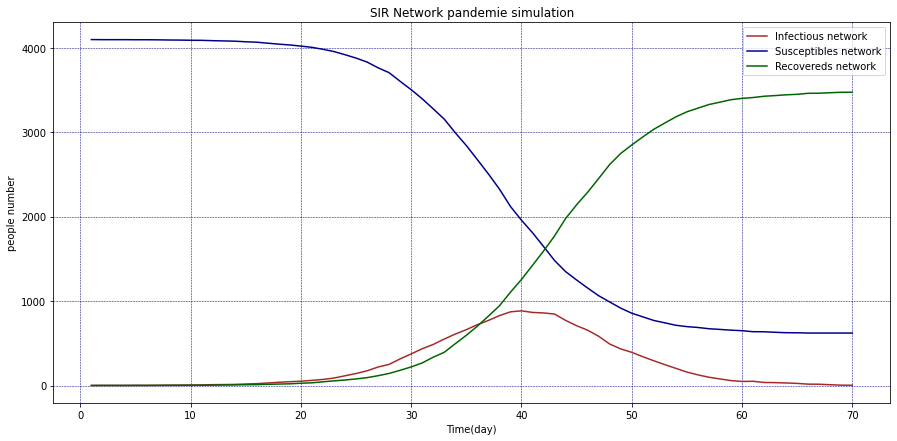

In [125]:
plt.figure(figsize=(15,7))
plt.rcParams.update({'font.size': 10})
plt.title('SIR Network pandemie simulation')
plt.plot(tdata,idata,'brown', label='Infectious network')
plt.plot(tdata,sdata, 'darkblue', label='Susceptibles network')
plt.plot(tdata,rdata, 'darkgreen', label='Recovereds network')
plt.legend(loc=0)
plt.xlabel('Time(day)')
plt.ylabel('people number')
plt.grid(color = 'navy', linestyle = '--', linewidth = 0.5)
plt.savefig('SIR-Network')
plt.show()